In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [9]:
# Load the CSV file into a pandas DataFrame
data = pd.read_csv('kmeans.csv')

data.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [10]:
# Remove any columns that are not relevant to the clustering
X = data.drop(['id'], axis=1)

In [13]:
# Normalize the data to ensure that all features have the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Determine the optimal number of clusters using the elbow method
# Within-Cluster Sum of Squares (WCSS), which is a measure of the variance of the data points 
#within each cluster
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


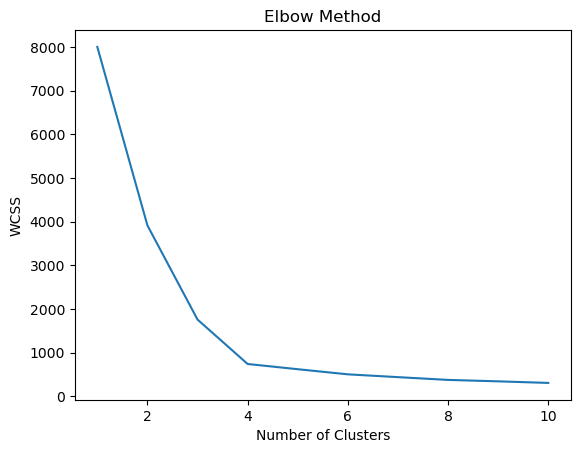

In [14]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

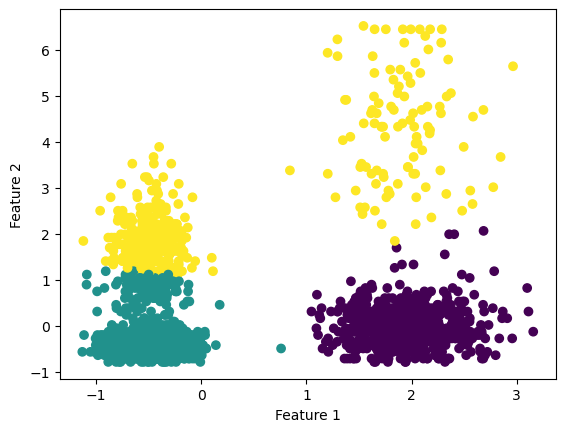

In [12]:
# Run the K-means clustering algorithm on the data using 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_scaled)
# Visualize the results
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=pred_y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()